In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [3]:
dataset_dir = 'CNN_Dataset'

In [4]:
# Image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # Scaling pixel values

In [6]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,  # Change to the path where your dataset is stored
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,           # Number of images to process at a time
    class_mode='binary',     # Since this is a binary classification problem
    subset='training'        # Set this to use for training
)

Found 1545 images belonging to 2 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'      # Set this to use for validation
)

Found 386 images belonging to 2 classes.


In [8]:
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification problem
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10


/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.5468 - loss: 0.6995 - val_accuracy: 0.5469 - val_loss: 0.6897
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.6875 - loss: 0.6795 - val_accuracy: 1.0000 - val_loss: 0.6563
Epoch 3/10


2024-09-15 11:41:27.269804: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/envs/Thesis/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-09-15 11:41:27.283869: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


48/48 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5453 - loss: 0.6902 - val_accuracy: 0.5521 - val_loss: 0.6893
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.5312 - loss: 0.6914 - val_accuracy: 0.0000e+00 - val_loss: 0.7370
Epoch 5/10


2024-09-15 11:42:31.408799: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


48/48 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5465 - loss: 0.6897 - val_accuracy: 0.5521 - val_loss: 0.6901
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.5000 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4872 - loss: 0.6926 - val_accuracy: 0.5495 - val_loss: 0.6888
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.4375 - loss: 0.7030 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 9/10


2024-09-15 11:44:27.982690: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


48/48 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5498 - loss: 0.6895 - val_accuracy: 0.5469 - val_loss: 0.6917
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.6562 - loss: 0.6868 - val_accuracy: 1.0000 - val_loss: 0.6720


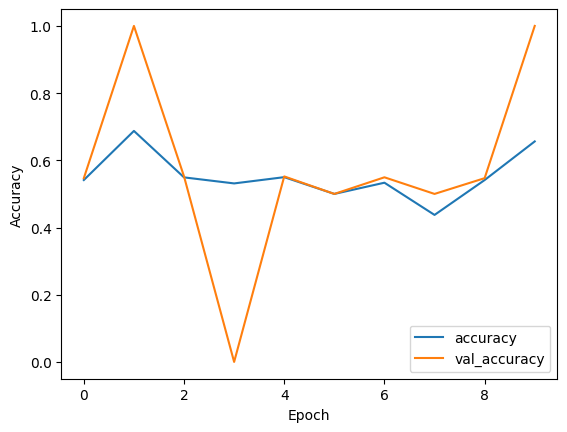

In [13]:
# Plot training & validation accuracy and loss values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [15]:
model.save('CNN_model.h5')